# Working with a dataset with categorical features
### Step 1. Reading the data

In [ ]:
import pandas as pd

def read_data(path):
    data = pd.read_csv(path, skiprows=0)
    #data = data.dropna()
    data_shuffled = data.sample(frac=1.0, random_state=0)
    return data_shuffled.drop('target', axis=1), data_shuffled['target']

X_train, Y_train = read_data("adult_train.csv")
X_test, Y_test = read_data("adult_test.csv")

X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
22278,49,Local-gov,110172,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
8950,49,Private,105431,HS-grad,9,Divorced,Other-service,Not-in-family,Black,Female,0,0,40,United-States
7838,31,Private,34374,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
16505,53,Private,191025,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,43,United-States
19140,30,Private,108247,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


### Step 2: Encoding the features as numbers.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dv = DictVectorizer()

X_dict_train = X_train.to_dict('records')
X_dict_test = X_test.to_dict('records')

X_encoded_train = dv.fit_transform(X_dict_train)
X_encoded_test = dv.transform(X_dict_test)

# Train a model 
tree_classifier = DecisionTreeClassifier()
myScores = cross_val_score(tree_classifier, X_encoded_train, Y_train, cv=4)
print("The tree classifier scores %0.2f with a std. dev. of %0.4f \n"% (myScores.mean(), myScores.std()))

The tree classifier scores 0.82 with a std. dev. of 0.0039 



### Step 3. Combining the steps.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
 # Build pipeline
pipeline = make_pipeline(
  DictVectorizer(),
  DecisionTreeClassifier()
)

# Train pipeline
pipeline.fit(X_dict_train, Y_train)

# Test pipeline
guess = pipeline.predict(X_dict_test)
print("The pipeline trains a DecisionTreeClassifier that gets a test accuracy of %0.4f " %(accuracy_score(Y_test, guess)))


The pipeline trains a DecisionTreeClassifier that gets a test accuracy of 0.8101 


We see here that the pipeline gives us a working classifier with a reasonable test accuracy.

# Task 2
## Decision trees and random forests


### Underfitting and overfitting in decision tree classifiers.###

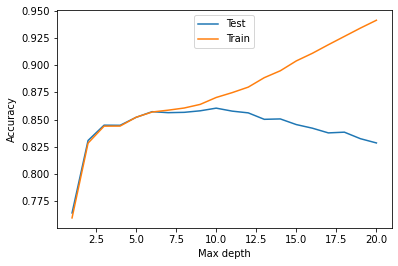

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

test_acc = []
train_acc = []

n_depths = 20

for i in range(n_depths):
    tree_classifier = DecisionTreeClassifier(max_depth=i+1)
    tree_classifier.fit(X_encoded_train, Y_train)

    # add data for DecisionTreeClassifier
    test_predict = tree_classifier.predict(X_encoded_test)
    train_predict = tree_classifier.predict(X_encoded_train)
    
    test_acc.append(accuracy_score(Y_test, test_predict))
    train_acc.append(accuracy_score(Y_train, train_predict))

print("Decision Tree Classifier")
x = np.linspace(1, n_depths, n_depths)
plt.plot(x, test_acc, label="Test")
plt.plot(x, train_acc, label="Train")
plt.xlabel('Max depth')
plt.ylabel('Accuracy')
plt.legend(loc='upper center')
plt.show()

### Underfitting and overfitting in random forest classifiers.

Testing random forest with 1 number of estimators
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


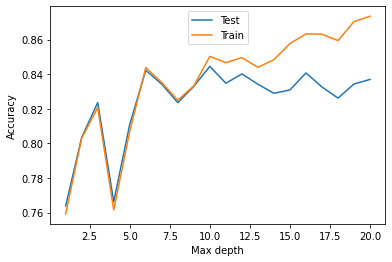

Highest achived accuracy for 1 nmb of estimators was 0.8445
Testing random forest with 10 number of estimators
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


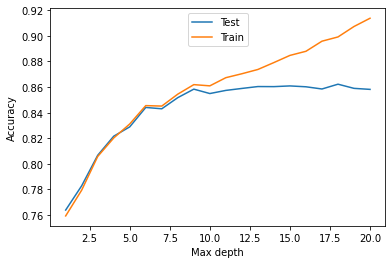

Highest achived accuracy for 10 nmb of estimators was 0.8622
Testing random forest with 50 number of estimators
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


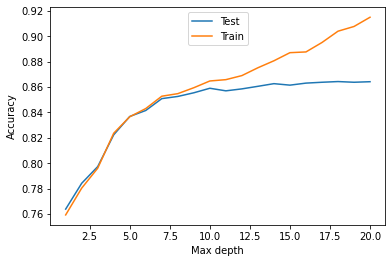

Highest achived accuracy for 50 nmb of estimators was 0.8643
Testing random forest with 100 number of estimators
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


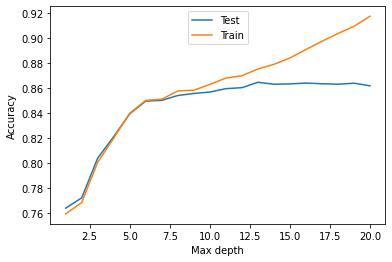

Highest achived accuracy for 100 nmb of estimators was 0.8644
Testing random forest with 250 number of estimators
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


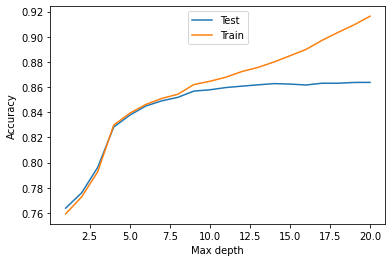

Highest achived accuracy for 250 nmb of estimators was 0.8638
Testing random forest with 500 number of estimators
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20.]


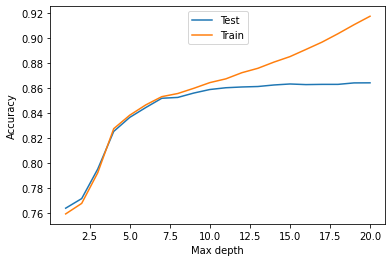

Highest achived accuracy for 500 nmb of estimators was 0.8641
Execution times: 
[6.885700309998356, 24.234948972938582, 86.26723066403065, 166.97172871907242, 407.246835183003, 873.7786125378916]


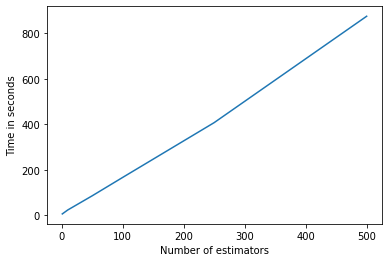

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import timeit

nmb_estimators_to_test = [1,10,50,100,250,500]
execution_time = []
execution_time.append(timeit.default_timer())
n_depths = 20
for nx in nmb_estimators_to_test:
    print("Testing random forest with %d number of estimators" %(nx))
    test_acc = []
    train_acc = []
    
    for i in range(n_depths):
        rf_classifier = RandomForestClassifier(max_depth=i+1, n_jobs=-1, n_estimators = nx)
        rf_classifier.fit(X_encoded_train, Y_train)

        # add data for RandomForestClassifier
        test_predict = rf_classifier.predict(X_encoded_test)
        train_predict = rf_classifier.predict(X_encoded_train)
        
        test_acc.append(accuracy_score(Y_test, test_predict))
        train_acc.append(accuracy_score(Y_train, train_predict))

    x = np.linspace(1, n_depths, n_depths)
    print(x)
    plt.plot(x, test_acc, label="Test")
    plt.plot(x, train_acc, label="Train")
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper center')
    plt.show()

    print("Highest achived accuracy for %d nmb of estimators was %0.4f" %(nx, max(test_acc)))
    # Store runtime
    execution_time.append(timeit.default_timer())

# Convert timestamps to time elapsed in seconds
time_in_secs = []
for i in range(len(execution_time)-1):
    time_in_secs.append(execution_time[i+1]-execution_time[i])

print("Execution times: ")
print(time_in_secs)
plt.plot(nmb_estimators_to_test, time_in_secs)
plt.xlabel('Number of estimators')
plt.ylabel('Time in seconds')
plt.show()





#### What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?
Since the random forest trains the decision trees on a subset of samples and features from the available training data the resulting tree will be different than that of a decision tree classifier. We can also see that this random selection of features/samples generates a more erratic accuracy curve when it sometimes chooses a preferable subset and sometimes chooses a bad subset. 

#### What happens with the curve for random forests as the ensemble size grows?
The curve becomes smoother as it gets closer to the statistical probability of the random forest model. We can see that unlike for the decision tree the random forest accuracy for the test set stagnates instead of decreasing. This is due to the fact that random forests are more resistant to overfitting.

#### What happens with the best observed test set accuracy as the ensemble size grows? 
The best test accuracy stays about the same when ensemble size grows as we can see from the printed accuracy. This is presumably since this accuracy is the highest accuracy achievable for this model with these hyperparameters. 

#### What happens with the training time as the ensemble size grows? 
As we can see in the last graph the training time increases linearly with the number of trees used in the random forest.

In [ ]:
# Create panda with feature names and importances 
panda = pd.DataFrame()
panda['feat names'] = dv.feature_names_
panda['feat importance'] = rf_classifier.feature_importances_

# Then sort the panda by feature importance and print
panda.sort_values(by='feat importance', ascending=False, inplace=True)
print(panda)

                                    feat names  feat importance
1                                 capital-gain         0.133432
24           marital-status=Married-civ-spouse         0.100145
0                                          age         0.097140
3                                education-num         0.087488
21                              hours-per-week         0.063025
..                                         ...              ...
57   native-country=Outlying-US(Guam-USVI-etc)         0.000034
73                     occupation=Armed-Forces         0.000014
45                     native-country=Honduras         0.000011
102                     workclass=Never-worked         0.000003
44           native-country=Holand-Netherlands         0.000001

[108 rows x 2 columns]


The most important features to knowing if someones income is above 50k is capital gain, beeing married, age, education and hours worked per week. Intuitively it makes sense that these factors have a big inpact on income level since they contibute either to stability in life and work or directly correlate to earning more money. We can assume that having a lot of capital gain, being married, being older, having a high level of education and working a lot of hours causes people to earn more money. Likewise, not having capital gain, not being married, being young, having little to no education and not working many hours probably causes an individuals total income to be lower.

As we can read from Parr's article an alternative to this feature importance method we could instead use permutation importance or drop-column importance to get importance score for features. 